# Trabalho IAA002 - Preços de carros Brasil

Importação das libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## 1 - Análise Exploratória dos Dados

### 1.a Carregamento dos dados e verificação básica dos dados

In [2]:
data = pd.read_csv('./precos_carros_brasil.csv')
print(data.columns)
print(data.dtypes)
print(f"Linhas: {data.shape[0]}")
print(f"Colunas: {data.shape[1]}")
data.head()

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')
year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object
Linhas: 267542
Colunas: 11


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


### 1.b Tratando possíveis valores faltantes

In [3]:
# Verificando linhas em que todas as colunas são vazias

print(data.isna().all(axis=1).sum())

65245


In [4]:
# Removendo as linhas em que todas as colunas são vazias

data.dropna(how='all', inplace=True)
print(data.isna().all(axis=1).sum())

0


In [5]:
# Verificando se há colunas com valores vazios

data.isna().any()

year_of_reference     False
month_of_reference    False
fipe_code             False
authentication        False
brand                 False
model                 False
fuel                  False
gear                  False
engine_size           False
year_model            False
avg_price_brl         False
dtype: bool

### 1.c Tratando dados duplicados

In [6]:
# Verificando se há valores duplicados

data.duplicated().sum()

2

In [7]:
# Removendo valores duplicados

data.drop_duplicates(inplace=True)

In [8]:
# Confirmando que valores duplicados foram removidos

data.duplicated().sum()

0

### 1.d Estatística descritiva dos dados

Criar duas categorias, para separar colunas numéricas e categóricas

In [9]:
# Verificando o tipo de dados das colunas

data.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [10]:
# Verificando se 'year_of_reference' tem algum valor cujo decimal é diference de 0

data['year_of_reference'].unique()

array([2021., 2022., 2023.])

In [11]:
# Convertendo 'year_of_reference' para inteiro

data['year_of_reference'] = data['year_of_reference'].astype(int)
print(data['year_of_reference'].dtypes)
data['year_of_reference'].unique()

int64


array([2021, 2022, 2023])

In [12]:
# Convertendo 'engine_size' para float

data['engine_size'] = data['engine_size'].str.replace(',', '.').astype(float)
print(data['engine_size'].dtypes)
data['engine_size'].unique()

float64


array([1. , 1.6, 2.2, 4.3, 2.5, 1.8, 2. , 4.2, 3.8, 4.1, 5.7, 2.8, 2.4,
       1.4, 3.6, 6.2, 3. , 1.2, 1.5, 1.3, 1.9, 2.3, 4. , 3.9, 5. , 3.5,
       3.2, 2.7, 3.3])

In [13]:
# Verificando se year_model tem algum valor cujo decimal é diferente de 0

data['year_model'].unique()

array([2002., 2001., 2000., 2004., 2003., 2005., 2015., 2012., 2011.,
       2010., 2009., 2008., 2007., 2014., 2013., 2006., 2016., 2017.,
       2019., 2018., 2021., 2020., 2022., 2023.])

In [14]:
# Convertendo 'year_model' para inteiro

data['year_model'] = data['year_model'].astype(int)
print(data['year_model'].dtypes)
data['year_model'].unique()

int64


array([2002, 2001, 2000, 2004, 2003, 2005, 2015, 2012, 2011, 2010, 2009,
       2008, 2007, 2014, 2013, 2006, 2016, 2017, 2019, 2018, 2021, 2020,
       2022, 2023])

In [15]:
# Criação de uma coluna 'model_age' para representar a idade do veículo

data['model_age'] = pd.Timestamp.now().year - data['year_model']
print(data['model_age'].unique())
data.head()

[22 23 24 20 21 19  9 12 13 14 15 16 17 10 11 18  8  7  5  6  3  4  2  1]


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,model_age
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,9162.0,22
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,8832.0,23
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,8388.0,24
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,8453.0,24
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,12525.0,23


In [16]:
# Separando colunas categóricas de colunas numéricas

numeric_cols = [col for col in data.columns if data[col].dtype != 'object']
category_cols = [col for col in data.columns if data[col].dtype == 'object']

print(f"Colunas numéricas: {numeric_cols}")
print(f"Colunas categóricas: {category_cols}")

Colunas numéricas: ['year_of_reference', 'engine_size', 'year_model', 'avg_price_brl', 'model_age']
Colunas categóricas: ['month_of_reference', 'fipe_code', 'authentication', 'brand', 'model', 'fuel', 'gear']


In [17]:
# Resumo das variáveis numércias

data[numeric_cols].describe()

,year_of_reference,engine_size,year_model,avg_price_brl,model_age
count,202295.000000,202295.000000,202295.000000,202295.000000,202295.000000
mean,2021.564695,1.822302,2011.271514,52756.765713,12.728486
std,0.571904,0.734432,6.376241,51628.912116,6.376241
min,2021.000000,1.000000,2000.000000,6647.000000,1.000000
25%,2021.000000,1.400000,2006.000000,22855.000000,8.000000
50%,2022.000000,1.600000,2012.000000,38027.000000,12.000000
75%,2022.000000,2.000000,2016.000000,64064.000000,18.000000
max,2023.000000,6.200000,2023.000000,979358.000000,24.000000


In [18]:
# Resumo das variáveis categóricas

data[category_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear
count,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual
freq,24260,425,1,44962,425,168684,161883


### 1.e Imprimir a contagem de valores por modelo e marca do veículo

In [19]:
# Imprimindo a contagem de valores por marca (brand)

data['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

In [20]:
# Imprimindo a contagem de valores por modelo (model)

data.groupby(['brand', 'model'])['model'].value_counts()

brand            model                                   
Fiat             500 ABARTH MULTIAIR 1.4 TB 16V 3p            50
                 500 Cabrio Dualogic Flex 1.4 8V              75
                 500 Cabrio Flex 1.4 8V Mec.                  50
                 500 Cabrio/500 Coupe Gucci/Flex 1.4 Aut.    100
                 500 Cult 1.4 Flex 8V EVO Dualogic           100
                                                            ... 
VW - VolksWagen  up! move I MOTION 1.0 T. Flex 12V 3p         50
                 up! move I MOTION 1.0 T. Flex 12V 5p        125
                 up! take 1.0 T. Flex 12V 3p                 100
                 up! take 1.0 Total Flex 12V 5p              150
                 up! track 1.0 Total Flex 12V 5p              25
Name: count, Length: 2112, dtype: int64

### 1.f Breve explicação sobre os principais resultados encontados na Análise Exploratória de Dados

Inicialmente a base possuía 267542 linhas, sendo que dessas, 65245 linhas possuíam todas as colunas vazias e 2 linhas eram duplicadas. Após a remoção das linhas completamente vazias e duplicadas, restaram 202295 linhas. A marca que mais tem modelos registrados nessa base de dados é a Fiat. O modelo de veículo mais novo tem 1 ano, o mais antigo tem 24 anos e a média é aproximadamente 12 anos. O veículo mais barato custa BRL 6647,00, o mais caro custa BRL 979358,00 e a média é aproximadamente BRL 52756,76.

___

## 2 - Visualização dos dados

### 2.a Gráfico da distribuição da quantidade de carros por marca

[Text(0, 0, '44962'),
 Text(0, 0, '44312'),
 Text(0, 0, '38590'),
 Text(0, 0, '33150'),
 Text(0, 0, '29191'),
 Text(0, 0, '12090')]

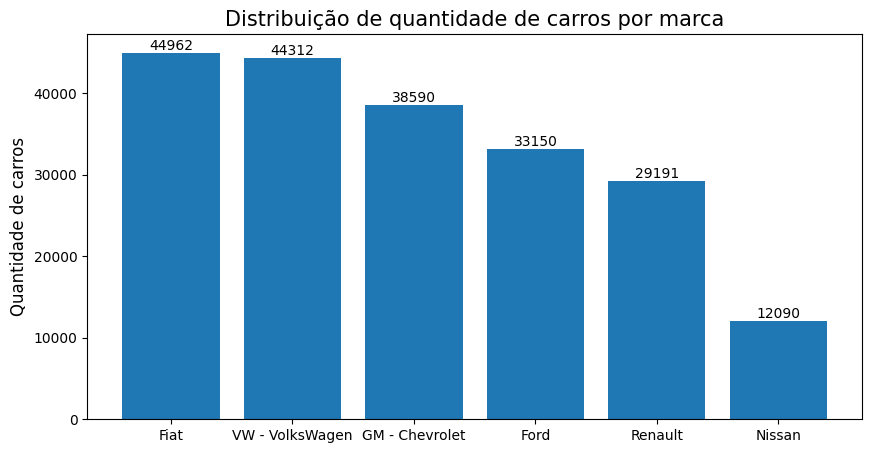

In [21]:
# Criando o gráfico 'Distribuição de quantidade de carros por marca'

plt.figure(figsize=(10, 5))
graph_brand_count = plt.bar(data['brand'].value_counts().keys(), data['brand'].value_counts())
plt.title('Distribuição de quantidade de carros por marca', fontsize=15)
plt.ylabel('Quantidade de carros', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.bar_label(graph_brand_count, size=10, label_type='edge')

### 2.b Gráfico da distribuição da quantidade de carros por tipo de transmissão

[Text(0, 0, '161883'), Text(0, 0, '40412')]

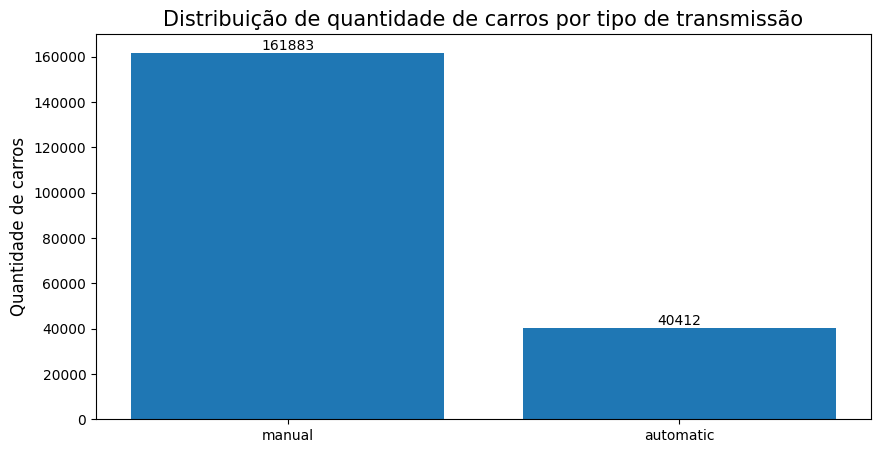

In [22]:
# Criando o gráfico 'Distribuição de quantidade de carros por transmissão'

plt.figure(figsize=(10, 5))
graph_gear_count = plt.bar(data['gear'].value_counts().keys(), data['gear'].value_counts())
plt.title('Distribuição de quantidade de carros por tipo de transmissão', fontsize=15)
plt.ylabel('Quantidade de carros', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.bar_label(graph_gear_count, size=10, label_type='edge')

In [23]:
# Separando os dados referentes ao ano de 2022

monthly_price_2022 = data.where(data['year_of_reference'] == 2022).groupby('month_of_reference')['avg_price_brl'].mean().round(2)

# Reindexando a série conforme os meses do ano

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_price_2022 = monthly_price_2022.reindex(month_order)
monthly_price_2022

month_of_reference
January      54840.27
February     55824.52
March        56848.95
April        57150.04
May          57799.76
June         58065.61
July         57894.00
August       57923.54
September    58198.94
October      58227.41
November     58215.63
December     57997.24
Name: avg_price_brl, dtype: float64

### 2.c Gráfico de evolução média de preço dos carros ao longo dos meses de 2022

[Text(0, 0, '54840.3'),
 Text(0, 0, '55824.5'),
 Text(0, 0, '56848.9'),
 Text(0, 0, '57150'),
 Text(0, 0, '57799.8'),
 Text(0, 0, '58065.6'),
 Text(0, 0, '57894'),
 Text(0, 0, '57923.5'),
 Text(0, 0, '58198.9'),
 Text(0, 0, '58227.4'),
 Text(0, 0, '58215.6'),
 Text(0, 0, '57997.2')]

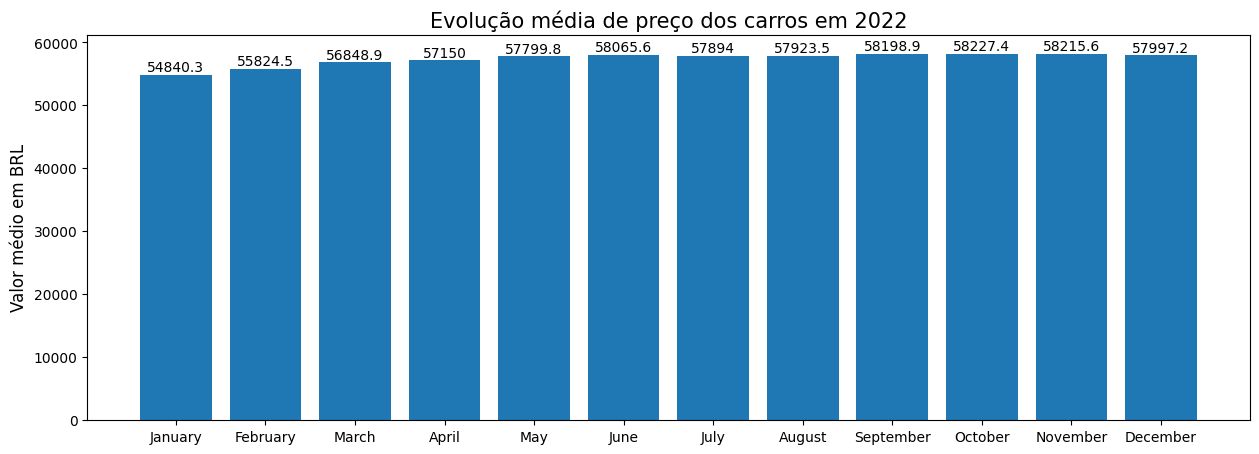

In [24]:
# Criando o gráfico 'Evolução média de preço dos carros em 2022'

plt.figure(figsize=(15, 5))
graph_monthly_price = plt.bar(monthly_price_2022.index, monthly_price_2022.values)
plt.title('Evolução média de preço dos carros em 2022', fontsize=15)
plt.ylabel('Valor médio em BRL', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.bar_label(graph_monthly_price, size=10, label_type='edge')



### 2.d Gráfico de distribuição da média de preço dos carros por marca e tipo de transmissão

In [25]:
# Agrupando os dados necessários para montar o gráfico

tansmission_brand_prices = data.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(2)
tansmission_brand_prices = tansmission_brand_prices.reset_index(name='Mean Price (BRL)')
tansmission_brand_prices


,brand,gear,Mean Price (BRL)
0,Fiat,automatic,97396.80
1,Fiat,manual,39694.44
2,Ford,automatic,84769.11
3,Ford,manual,51784.33
4,GM - Chevrolet,automatic,88156.92
5,GM - Chevrolet,manual,52119.42
6,Nissan,automatic,94230.60
7,Nissan,manual,52680.62
8,Renault,automatic,44028.01
9,Renault,manual,47648.80


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000')])

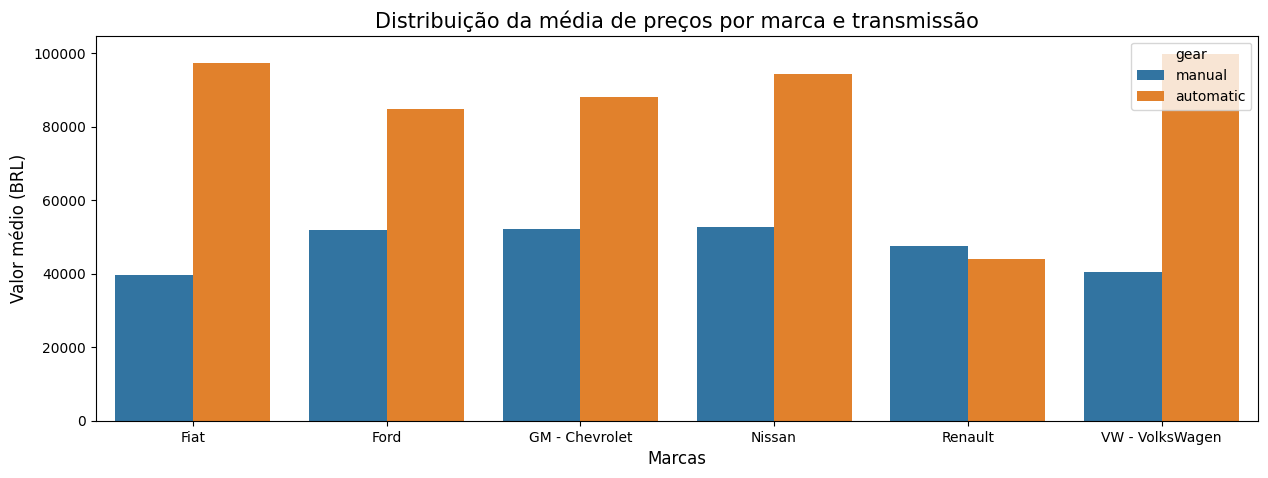

In [26]:
# Criando o gráfico de "Distribuição da média de preços por marca e tansmissão"

plt.figure(figsize=(15, 5))
sns.barplot(x='brand', y='Mean Price (BRL)', hue='gear', data=tansmission_brand_prices, hue_order=['manual', 'automatic'])
plt.title('Distribuição da média de preços por marca e transmissão', fontsize=15)
plt.ylabel('Valor médio (BRL)', fontsize=12)
plt.xlabel('Marcas', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

### 2.e Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item d

Observando os gráficos é possível perceber que, em geral, os veículos com transmissão manual são, em média, mais baratos que os veículos com transmissão automática. Porém há uma excessão nos veículos da marca Renault, que a média dos veículos com transmissão automática são mais baratos que os veículos manuais. Essa diferença nos valores pode estar associada também à idade dos modelos de veículos, pois a grande maioria dos veículos automáticos é mais recentes que os veículos manuais e, talvez no caso da Renault, é possível que seus carros mais antigos já tivessem transmissão manual

### 2.f Gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

In [27]:
# Agrupando os dados necessários para montar o gráfico

fuel_brand_prices = data.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(2)
fuel_brand_prices = fuel_brand_prices.reset_index(name='Mean Price (BRL)')
fuel_brand_prices


,brand,fuel,Mean Price (BRL)
0,Fiat,Alcohol,11509.51
1,Fiat,Diesel,99814.45
2,Fiat,Gasoline,37197.29
3,Ford,Alcohol,10148.91
4,Ford,Diesel,94525.53
5,Ford,Gasoline,45844.52
6,GM - Chevrolet,Alcohol,13697.72
7,GM - Chevrolet,Diesel,99817.32
8,GM - Chevrolet,Gasoline,56497.13
9,Nissan,Diesel,95534.07


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000'),
  Text(0, 160000.0, '160000')])

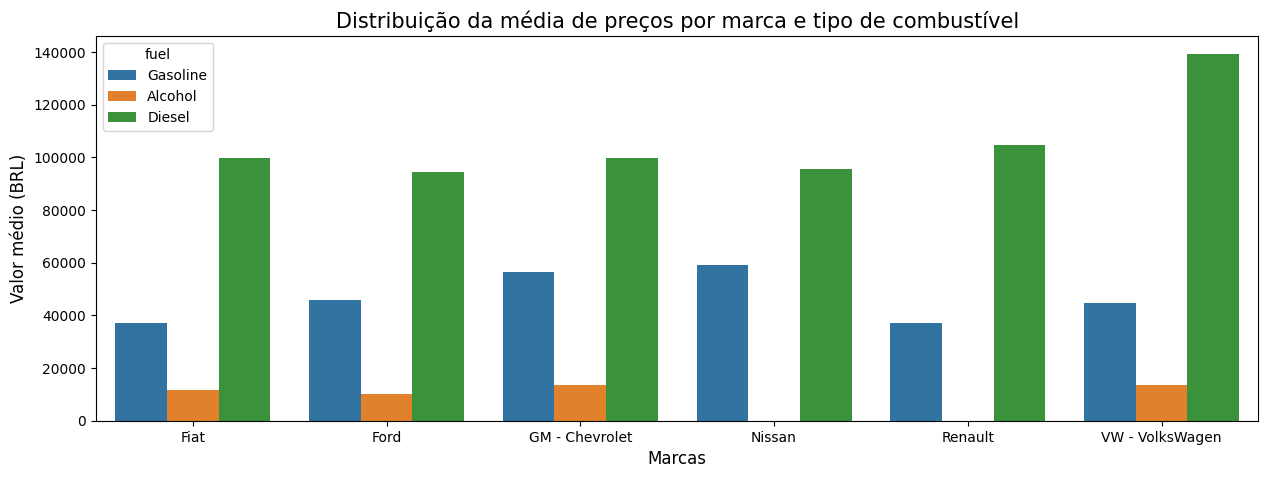

In [28]:
# Criando o gráfico de "Distribuição da média de preços por marca e tipo de combustível"

plt.figure(figsize=(15, 5))
sns.barplot(x='brand', y='Mean Price (BRL)', hue='fuel', data=fuel_brand_prices, hue_order=['Gasoline', 'Alcohol', 'Diesel'])
plt.title('Distribuição da média de preços por marca e tipo de combustível', fontsize=15)
plt.ylabel('Valor médio (BRL)', fontsize=12)
plt.xlabel('Marcas', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

### 2.g Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item f

É possível observar que os veículos a diesel, independente da marca, são, em média, os mais caros. Isso pode estar associado ao fato de que veículos movido a diesel geralmente são veículos de grande porte (camionetes e caminhões, por exemplo) e que são, intrinsicamente, mais caros. Além disso é possível ver que algumas marcas não possuem veículos movidos exclusivamente a alcool, visto que esses veículos são mais antigos e isso também pode explicar o preço mais baixo. Atualmente os veículos geralmente são flex, porém na tabela FIPE (de onde os dados foram extraídos) esses veículos são identificados como movidos a gasolina

---

## 3 - Aplicação de modelos de machine learning para prever o preço médio dos carros

Fazendo uma análise da variável resposta (variável target)

Text(0.5, 1.0, 'Distribuição de preços dos veículos')

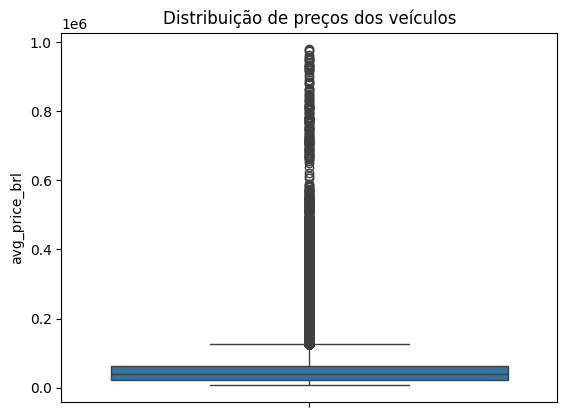

In [29]:
sns.boxplot(data['avg_price_brl']).set_title('Distribuição de preços dos veículos')


### 3.a Ecolha de variáveis númericas para serem as variáveis independentes

In [30]:
# Criando colunas para transformação dos valores categóricos em numéricos
# OBS: no caso de 'month_of_reference' a transformação será feita com base na ordem dos meses

data['month_of_reference_num'] = data['month_of_reference'].apply(lambda x: month_order.index(x))
data['fuel_num'] = LabelEncoder().fit_transform(data['fuel'])
data['gear_num'] = LabelEncoder().fit_transform(data['gear'])

data.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,model_age,month_of_reference_num,fuel_num,gear_num
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,9162.0,22,0,2,1
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,8832.0,23,0,2,1
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,8388.0,24,0,2,1
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,8453.0,24,0,0,1
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,12525.0,23,0,2,1


As variáveis que foram transformadas foram: `month_of_reference`, `fuel` e `gear`. Para não perder o valor original, foi criada uma coluna nova para cada uma dessas variávies transformadas adicionando o sufixo `_num` para diferenciar a variável numérica da categórica. Com relação a forma de transformação, para `fuel` e `gear` foi utilizada o método `fit_transform` da classe `LabelEncoder` da lib `sklearn.preprocessing`, pois aqui a ordem da conversão não faz muita diferença (o método `fit_transform` faz a transformação considerando os dados em ordem alfabetica, ou seja, no caso de `gear`, `automatic` será `0` e `manual` será `1`). Para o `month_of_reference` foi utilizada uma função _lambda_ para considerar a ordem correta dos mês e não em ordem alfabetica

In [31]:
# Escolhendo as variávies numéricas

non_numeric_cols = [col for col in data.columns if data[col].dtype == 'object']
data_num = data.drop(non_numeric_cols, axis=1)
data_num.head()

,year_of_reference,engine_size,year_model,avg_price_brl,model_age,month_of_reference_num,fuel_num,gear_num
0,2021,1.0,2002,9162.0,22,0,2,1
1,2021,1.0,2001,8832.0,23,0,2,1
2,2021,1.0,2000,8388.0,24,0,2,1
3,2021,1.0,2000,8453.0,24,0,0,1
4,2021,1.6,2001,12525.0,23,0,2,1


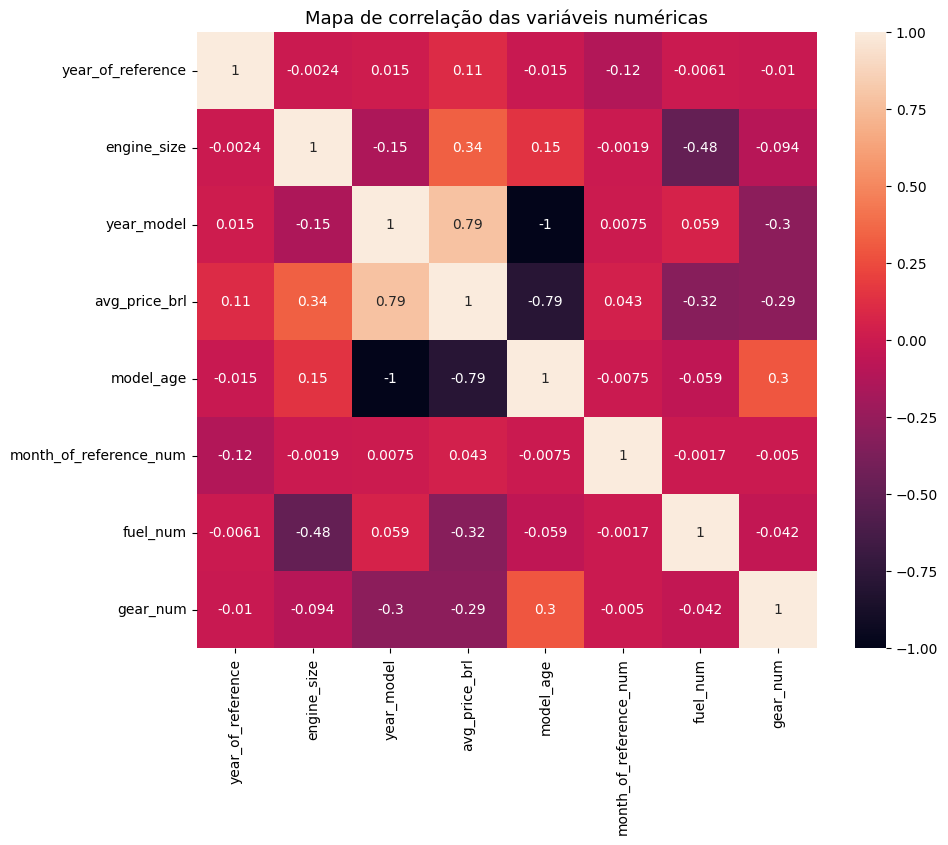

In [32]:
# Verificando a correlação das variáveis númericas com a variável alvo (avg_price_brl) através de um mapa de correlação das variáveis numéricas

plt.figure(figsize=(10, 8))
sns.heatmap(data_num.corr('spearman'), annot=True)
plt.title('Mapa de correlação das variáveis numéricas', fontsize=13)
plt.show()

Algo interessante de se observar no mapa de correlação é que as variávies `model_age` e `year_model` tem a mesma correlação, mas com sinais opostos. Isso se dá porque a variável `model_age` é derivada da variável `year_model` e o valor delas são inversamente proporcionais.

### 3.b Criação das partições para treino e teste

In [33]:
# Criação de uma variável X que contenha as variáveis independentes

X = data_num.drop(['avg_price_brl'], axis=1)
X.head()

,year_of_reference,engine_size,year_model,model_age,month_of_reference_num,fuel_num,gear_num
0,2021,1.0,2002,22,0,2,1
1,2021,1.0,2001,23,0,2,1
2,2021,1.0,2000,24,0,2,1
3,2021,1.0,2000,24,0,0,1
4,2021,1.6,2001,23,0,2,1


In [34]:
# Criação de uma variável Y que contenha a variável alvo

Y = data_num['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

In [35]:
# Separação das variáveis de treino e teste (75% para treino e 25% para teste)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=182)

In [36]:
# Verificação dos dados de treinamento

print(X_train.shape)
X_train.head()

(151721, 7)


,year_of_reference,engine_size,year_model,model_age,month_of_reference_num,fuel_num,gear_num
159220,2022,1.6,2022,2,7,2,1
110291,2022,1.6,2012,12,1,2,0
131937,2022,2.3,2018,6,4,1,1
130728,2022,1.5,2003,21,4,0,1
85759,2021,1.6,2013,11,10,2,1


In [37]:
# Verificação dos dados de teste

print(X_test.shape)
X_test.head()

(50574, 7)


,year_of_reference,engine_size,year_model,model_age,month_of_reference_num,fuel_num,gear_num
61916,2021,2.0,2020,4,7,2,0
165711,2022,1.6,2013,11,8,2,1
191367,2022,1.0,2004,20,11,2,1
104898,2022,1.0,2006,18,1,2,1
168713,2022,1.6,2011,13,8,2,1


### 3.c Treinamento dos modelos

In [38]:
# Random Forest sem especificar os parâmetros

model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)


RandomForestRegressor()

In [39]:
# Random Forest especificando alguns parâmetros

model_rf_parameters = RandomForestRegressor(min_samples_leaf = 32, min_samples_split=28, n_estimators=1182, random_state=44)
model_rf_parameters.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=32, min_samples_split=28,
                      n_estimators=1182, random_state=44)

In [40]:
# XGBoost sem especificar os parâmetros

model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# XGBoost especificando alguns parâmetros

model_xgboost_parameters = XGBRegressor(n_estimators=1020, max_depth=0, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, gamma=0, reg_alpha=0, reg_lambda=1)
model_xgboost_parameters.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=0, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1020, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 3.d Gravando os valores preditos

In [42]:
# Predição dos valores de teste com Random Forest sem especificar os parâmetros

predicted_values_rf = model_rf.predict(X_test)
predicted_values_rf

array([110428.09087597,  38325.74279623,  14598.11880383, ...,
        39167.22761563,  22304.48025948,  84952.20422906])

In [43]:
# Predição dos valores de teste com Random Forest especificando alguns parâmetros

predicted_values_rf_parameters = model_rf_parameters.predict(X_test)
predicted_values_rf_parameters

array([104458.90527784,  38246.07697526,  14349.17110823, ...,
        39030.00100589,  22027.57002027,  84244.74657091])

In [44]:
# Predição dos valores de teste com XGBoost sem especificar os parâmetros

predicted_values_xgboost = model_xgboost.predict(X_test)
predicted_values_xgboost

array([108862.21 ,  38506.547,  14641.488, ...,  38307.105,  21627.533,
        82348.54 ], dtype=float32)

In [45]:
# Predição dos valores de teste com XGBoost especificando alguns parâmetros

predicted_values_xgboost_parameters = model_xgboost_parameters.predict(X_test)
predicted_values_xgboost_parameters

array([113170.54 ,  38321.   ,  14700.919, ...,  39020.703,  22308.86 ,
        85103.914], dtype=float32)

### 3.e Análise de importância das variáveis

In [46]:
# Análise de importância das variáveis com Random Forest sem especificar os parâmetros

importances_rf = pd.DataFrame(model_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
importances_rf

,importance
engine_size,0.489330
year_model,0.208871
model_age,0.197773
gear_num,0.041368
fuel_num,0.035553
year_of_reference,0.014163
month_of_reference_num,0.012941


In [47]:
# Análise de importância das variáveis com Random Forest especificando alguns parâmetros

importances_rf_parameters = pd.DataFrame(model_rf_parameters.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
importances_rf_parameters

,importance
engine_size,0.495188
model_age,0.213050
year_model,0.212451
fuel_num,0.036584
gear_num,0.027360
year_of_reference,0.011666
month_of_reference_num,0.003701


In [48]:
# Análise de importância das variáveis com XGBoost sem especificar os parâmetros

importances_xgboost = pd.DataFrame(model_xgboost.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
importances_xgboost

,importance
engine_size,0.415251
year_model,0.292736
fuel_num,0.176227
gear_num,0.086874
year_of_reference,0.023717
month_of_reference_num,0.005194
model_age,0.000000


In [49]:
# Análie de importância das variáveis com XGBoost especificando alguns parâmetros

importances_xgboost_parameters = pd.DataFrame(model_xgboost_parameters.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
importances_xgboost_parameters

,importance
fuel_num,0.252799
model_age,0.243831
engine_size,0.191347
year_model,0.149669
gear_num,0.087655
year_of_reference,0.048480
month_of_reference_num,0.026219


### 3.f Análise dos resultados da importância das variáveis
   
Com exceção do modelo XGBoost com parâmetros, em todos a variável `engine_size` aparentou maior importância. No Random Forest, há uma diferença quando se especifíca parâmetros, sendo que `model_age` se torna mais importante que `year_model` e `fuel` também fica mais importante do que `gear`. No modelo XGBoost com parâmetros, a importância de todas as variáveis como um todo diminuiram em relação ao XGBoost sem especificar parâmetros

### 3.g Escolhendo o melhor modelo com base nas métricas de avaliação MSE, MAE e R2

In [50]:
# Calculando métricas para o Random Forest sem parâmetros

mse_rf = mean_squared_error(Y_test, predicted_values_rf)
mae_rf = mean_absolute_error(Y_test, predicted_values_rf)
r2_rf = r2_score(Y_test, predicted_values_rf)

print(f"Random Forest sem parâmetros:\n MSE: {mse_rf}\n MAE: {mae_rf}\n R2: {r2_rf}")

# Calculando métricas para o Random Forest com parâmetros

mse_rf_parameters = mean_squared_error(Y_test, predicted_values_rf_parameters)
mae_rf_parameters = mean_absolute_error(Y_test, predicted_values_rf_parameters)
r2_rf_parameters = r2_score(Y_test, predicted_values_rf_parameters)

print(f"Random Forest com parâmetros:\n MSE: {mse_rf_parameters}\n MAE: {mae_rf_parameters}\n R2: {r2_rf_parameters}")

# Calculando métricas para o XGBoost sem parâmetros

mse_xgboost = mean_squared_error(Y_test, predicted_values_xgboost)
mae_xgboost = mean_absolute_error(Y_test, predicted_values_xgboost)
r2_xgboost = r2_score(Y_test, predicted_values_xgboost)

print(f"XGBoost sem parâmetros:\n MSE: {mse_xgboost}\n MAE: {mae_xgboost}\n R2: {r2_xgboost}")

# Calculando métricas para o XGBoost com parâmetros

mse_xgboost_parameters = mean_squared_error(Y_test, predicted_values_xgboost_parameters)
mae_xgboost_parameters = mean_absolute_error(Y_test, predicted_values_xgboost_parameters)
r2_xgboost_parameters = r2_score(Y_test, predicted_values_xgboost_parameters)

print(f"XGBoost com parâmetros:\n MSE: {mse_xgboost_parameters}\n MAE: {mae_xgboost_parameters}\n R2: {r2_xgboost_parameters}")

Random Forest sem parâmetros:
 MSE: 188064510.39478058
 MAE: 7191.19439003916
 R2: 0.9262282950647398
Random Forest com parâmetros:
 MSE: 204460241.6441984
 MAE: 7278.085092101341
 R2: 0.9197967730014285
XGBoost sem parâmetros:
 MSE: 152244424.0590366
 MAE: 6752.567516685791
 R2: 0.9402793716573886
XGBoost com parâmetros:
 MSE: 201903196.18120423
 MAE: 7334.914043953152
 R2: 0.9207998203228294


Melhor Modelo: XGBoost sem parâmetros

### 3.h Explicação sobre qual modelo gerou o melhor resultado
   
Com base nas métricas levantadas no item 3.g, é possível observar que o XGBoost sem parâmetros específicos teve o melhor desempenho, pois as métricas relacionadas a erro (MSE e MAE) foram as menores entre os três e a métrica R2, que indica o quão bom é o modelo, teve o maior valor 